In [ ]:
import numpy as np

# --- Шаг 1: Определяем параметры нашего примера ---
n1, n2, n3, n4 = 2, 3, 5, 7

print(f"Параметры: n1={n1}, n2={n2}, n3={n3}, n4={n4}\n")

# --- Шаг 2: Определяем структуру и размеры блоков ---
# Порядок блоков, как в вашем коде
block_order = ['{3,4}', '{2,4}', '{1,4}', '{2,3}', '{1,3}', '{1,2}']
dims = {
    '{3,4}': n3 * n4,  # Размер 2*3 = 6
    '{2,4}': n2 * n4,  # Размер 3*3 = 9
    '{1,4}': n1 * n4,  # Размер 2*3 = 6
    '{2,3}': n2 * n3,  # Размер 3*2 = 6
    '{1,3}': n1 * n3,  # Размер 2*2 = 4
    '{1,2}': n1 * n2   # Размер 2*3 = 6
}
total_dim = sum(dims.values())  # Общая длина вектора: 6+9+6+6+4+6 = 37

# Вычисляем начальные индексы каждого блока
offsets = np.cumsum([0] + [dims[k] for k in block_order])
block_indices = {key: (offsets[i], offsets[i+1]) for i, key in enumerate(block_order)}

# --- Шаг 3: Создаем пустой вектор нужной длины ---
v1 = np.zeros((total_dim, 1))
print(f"Создан пустой вектор v1 размером {v1.shape}\n")

# --- Шаг 4: Заполняем вектор согласно аналитической формуле v₁ ---

# --- Компонент 1: (n₁) * e_{3,4} ---
# Коэффициент: n1 = 2
# Блок: {3,4}, индексы с 0 по 6
start, end = block_indices['{3,4}']
v1[start:end] = n1

# --- Компонент 2: -(n₃) * e_{1,4} ---
# Коэффициент: -n3 = -2
# Блок: {1,4}, индексы с 15 по 21
start, end = block_indices['{1,4}']
v1[start:end] = -n3

# --- Компонент 3: -(n₄) * e_{1,3} ---
# Коэффициент: -n4 = -3
# Блок: {1,3}, индексы с 27 по 31
start, end = block_indices['{1,3}']
v1[start:end] = -n4

# --- Шаг 5: Выводим результат ---
print("--- Итоговый вектор v1 ---")
print("Блоки {2,4}, {2,3}, {1,2} остаются нулевыми, как и предсказывает формула.")
print("Содержимое вектора v1 (транспонированное для удобства):")
print(v1.T)

Параметры: n1=2, n2=3, n3=5, n4=7

Создан пустой вектор v1 размером (101, 1)

--- Итоговый вектор v1 ---
Блоки {2,4}, {2,3}, {1,2} остаются нулевыми, как и предсказывает формула.
Содержимое вектора v1 (транспонированное для удобства):
[[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -7. -7. -7. -7. -7.
  -7. -7. -7. -7. -7.  0.  0.  0.  0.  0.  0.]]


In [ ]:
block1_1 = n1 * np.kron(np.ones((1, n3)), np.ones((1, n4)))
block1_2 = 0 * np.kron(np.ones((1, n2)), np.ones((1, n4)))
block1_3 = - n3 * np.kron(np.ones((1, n1)), np.ones((1, n4)))
block1_4 = 0 * np.kron(np.ones((1, n2)), np.ones((1, n3)))
block1_5 = -n4*np.kron(np.ones((1, n1)), np.ones((1, n3)))
block1_6 = 0 * np.kron(np.ones((1, n1)), np.ones((1, n2)))
V1 = np.hstack((block1_1, block1_2, block1_3, block1_4, block1_5, block1_6))
print(V1)

[[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -7. -7. -7. -7. -7.
  -7. -7. -7. -7. -7.  0.  0.  0.  0.  0.  0.]]


In [ ]:
def build_M_from_image_swapped(n1, n2, n3, n4):
    """
    Строит матрицу L•Lᵀ по изображению с инвертированной нотацией.
    """
    # Исправленные размерности блоков
    dims = [n3*n4, n2*n4, n1*n4, n2*n3, n1*n3, n1*n2]
    total_cols = sum(dims)


    # Новая интерпретация: E - единичная, I - из единиц
    def E(n): return np.eye(n)
    def I(shape): return np.ones(shape)
    def Z(shape): return np.zeros(shape)

    print(f"Размерности блоков (строки x столбцы):")
    print(f"  d1: {dims[0]}")
    print(f"  d2: {dims[1]}")
    print(f"  d3: {dims[2]}")
    print(f"  d4: {dims[3]}")
    print(f"  d5: {dims[4]}")
    print(f"  d6: {dims[5]}")
    print(f"Общее количество столбцов: {total_cols}")

    # --- Блочная строка 1 (размерность: dims[0] x total_cols) ---
    block_1_1 = (n2+n1)*np.kron(E(n3),E(n4)); block_1_2 = np.kron(I((n3,n2)), E(n4)); block_1_3 = -np.kron(I((n3,n1)),E(n4)); block_1_4 = np.kron(np.kron(I((1,n2)),E(n3)), I((n4,1))); block_1_5 = -np.kron(np.kron(I((1,n1)),E(n3)), I((n4, 1))); block_1_6 = Z((n3*n4, n1*n2))
    row1 = [ block_1_1, block_1_2, block_1_3, block_1_4, block_1_5, block_1_6 ]
    print(f"Размерности row1 блоков: {block_1_1.shape}, {block_1_2.shape}, {block_1_3.shape}, {block_1_4.shape}, {block_1_5.shape}, {block_1_6.shape}")

    # # --- Блочная строка 2 (размерность: dims[1] x total_cols) ---
    block_2_1 = np.kron(I((n2,n3)),E(n4)); block_2_2 = (n3+n1)*np.kron(E(n2),E(n4)); block_2_3 = np.kron(I((n2,n1)),E(n4)); block_2_4 = np.kron(E(n2),I((n4,n3))); block_2_5 = Z((n2*n4,n1*n3)); block_2_6 = np.kron(-np.kron(I((1,n1)),E(n2)), I((n4,1)))
    row2 = [ block_2_1, block_2_2, block_2_3, block_2_4, block_2_5, block_2_6 ]
    print(f"Размерности row2 блоков: {block_2_1.shape}, {block_2_2.shape}, {block_2_3.shape}, {block_2_4.shape}, {block_2_5.shape}, {block_2_6.shape}")

    # # --- Блочная строка 3 (размерность: dims[2] x total_cols) ---
    block_3_1 = -np.kron(I((n1, n3)),E(n4)); block_3_2 = np.kron(I((n1,n2)),E(n4)); block_3_3 = (n3+n2)*np.kron(E(n1),E(n4)); block_3_4 = Z((n1*n4,n2*n3)); block_3_5 = np.kron(E(n1), I((n4, n3))); block_3_6 = -np.kron(E(n1), I((n4, n2)))
    row3 = [ block_3_1, block_3_2, block_3_3, block_3_4, block_3_5, block_3_6 ]
    print(f"Размерности row3 блоков: {block_3_1.shape}, {block_3_2.shape}, {block_3_3.shape}, {block_3_4.shape}, {block_3_5.shape}, {block_3_6.shape}")

    # # --- Блочная строка 4 (размерность: dims[3] x total_cols) ---
    block_4_1 = np.kron(np.kron(I((n2,1)),E(n3)), I((1, n4))); block_4_2 = np.kron(E(n2), I((n3,n4))); block_4_3 = Z((n2*n3,n1*n4)); block_4_4 = (n1+n4)*np.kron(E(n2),E(n3)); block_4_5 = np.kron(I((n2,n1)),E(n3)); block_4_6 = np.kron(np.kron(I((1, n1)), E(n2)), I((n3, 1)))
    row4 = [ block_4_1, block_4_2, block_4_3, block_4_4, block_4_5, block_4_6 ]
    print(f"Размерности row4 блоков: {block_4_1.shape}, {block_4_2.shape}, {block_4_3.shape}, {block_4_4.shape}, {block_4_5.shape}, {block_4_6.shape}")

    # # --- Блочная строка 5 (размерность: dims[4] x total_cols) ---
    block_5_1 = -np.kron(np.kron(I((n1,1)),E(n3)), I((1, n4))); block_5_2 = Z((n1*n3, n2*n4)); block_5_3 = np.kron(E(n1), I((n3, n4))); block_5_4 = np.kron(I((n1, n2)),E(n3)); block_5_5 = (n2+n4)*np.kron(E(n1),E(n3)); block_5_6 = np.kron(E(n1), I((n3, n2)))
    row5 = [ block_5_1, block_5_2, block_5_3, block_5_4, block_5_5, block_5_6 ]
    print(f"Размерности row5 блоков: {block_5_1.shape}, {block_5_2.shape}, {block_5_3.shape}, {block_5_4.shape}, {block_5_5.shape}, {block_5_6.shape}")

    # # --- Блочная строка 6 (размерность: dims[5] x total_cols) ---
    block_6_1 = Z((n1 * n2, n3 * n4)); block_6_2 = -np.kron(np.kron(I((n1, 1)),E(n2)), I((1, n4))); block_6_3 = -np.kron(E(n1), I((n2, n4))); block_6_4 = np.kron(np.kron(I((n1,1)),E(n2)), I((1, n3))); block_6_5 = np.kron(E(n1), I((n2,n3))); block_6_6 = (n4+n3)*np.kron(E(n1),E(n2))
    row6 = [ block_6_1, block_6_2, block_6_3, block_6_4, block_6_5, block_6_6 ]
    print(f"Размерности row6 блоков: {block_6_1.shape}, {block_6_2.shape}, {block_6_3.shape}, {block_6_4.shape}, {block_6_5.shape}, {block_6_6.shape}")


    #M_swapped = np.block([row1, row2, row3, row4, row5, row6])
    #return M_swapped
    return np.block([row1, row2, row3, row4, row5, row6])

LLT = build_M_from_image_swapped(n1, n2, n3, n4)
LLT

Размерности блоков (строки x столбцы):
  d1: 35
  d2: 21
  d3: 14
  d4: 15
  d5: 10
  d6: 6
Общее количество столбцов: 101
Размерности row1 блоков: (35, 35), (35, 21), (35, 14), (35, 15), (35, 10), (35, 6)
Размерности row2 блоков: (21, 35), (21, 21), (21, 14), (21, 15), (21, 10), (21, 6)
Размерности row3 блоков: (14, 35), (14, 21), (14, 14), (14, 15), (14, 10), (14, 6)
Размерности row4 блоков: (15, 35), (15, 21), (15, 14), (15, 15), (15, 10), (15, 6)
Размерности row5 блоков: (10, 35), (10, 21), (10, 14), (10, 15), (10, 10), (10, 6)
Размерности row6 блоков: (6, 35), (6, 21), (6, 14), (6, 15), (6, 10), (6, 6)


array([[ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 12.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 12.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 12.]])

In [ ]:
print((LLT @ V1.T).transpose())

[[  34.   34.   34.   34.   34.   34.   34.   34.   34.   34.   34.   34.
    34.   34.   34.   34.   34.   34.   34.   34.   34.   34.   34.   34.
    34.   34.   34.   34.   34.   34.   34.   34.   34.   34.   34.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.  -85.  -85.  -85.  -85.
   -85.  -85.  -85.  -85.  -85.  -85.  -85.  -85.  -85.  -85.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0. -119. -119. -119. -119. -119. -119. -119. -119. -119. -119.    0.
     0.    0.    0.    0.    0.]]


In [ ]:
17*7

119

In [ ]:
block2_1 = 0 * np.kron(np.ones((1, n3)), np.ones((1, n4)))
block2_2 = n1 * np.kron(np.ones((1, n2)), np.ones((1, n4)))
block2_3 = n2 * np.kron(np.ones((1, n1)), np.ones((1, n4)))
block2_4 = 0 * np.kron(np.ones((1, n2)), np.ones((1, n3)))
block2_5 = 0*np.kron(np.ones((1, n1)), np.ones((1, n3)))
block2_6 = -n4 * np.kron(np.ones((1, n1)), np.ones((1, n2)))
V2 = np.hstack((block2_1, block2_2, block2_3, block2_4, block2_5, block2_6))
print(V2)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.
   2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0. -7. -7. -7. -7. -7. -7.]]


In [ ]:
print((LLT @ V2.T).transpose())

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   34.
    34.   34.   34.   34.   34.   34.   34.   34.   34.   34.   34.   34.
    34.   34.   34.   34.   34.   34.   34.   34.   51.   51.   51.   51.
    51.   51.   51.   51.   51.   51.   51.   51.   51.   51.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. -119.
  -119. -119. -119. -119. -119.]]


In [ ]:
block3_1 = 0 * np.kron(np.ones((1, n3)), np.ones((1, n4)))
block3_2 = 0 * np.kron(np.ones((1, n2)), np.ones((1, n4)))
block3_3 = 0 * np.kron(np.ones((1, n1)), np.ones((1, n4)))
block3_4 = n1 * np.kron(np.ones((1, n2)), np.ones((1, n3)))
block3_5 = n2 * np.kron(np.ones((1, n1)), np.ones((1, n3)))
block3_6 = n3 * np.kron(np.ones((1, n1)), np.ones((1, n2)))
V3 = np.hstack((block3_1, block3_2, block3_3, block3_4, block3_5, block3_6))
print(V3)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2.
  2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 5.
  5. 5. 5. 5. 5.]]


In [ ]:
print((LLT @ V3.T).transpose())

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 34. 34.
  34. 34. 34. 34. 34. 34. 34. 34. 34. 34. 34. 34. 34. 51. 51. 51. 51. 51.
  51. 51. 51. 51. 51. 85. 85. 85. 85. 85. 85.]]


In [ ]:
def eig1(n1, n2, n3, n4):
  eigenvalue = n1 + n2 + n3 + n4
  multiplicity = 3
  block1_1 = n1 * np.kron(np.ones((1, n3)), np.ones((1, n4)))
  block1_2 = 0 * np.kron(np.ones((1, n2)), np.ones((1, n4)))
  block1_3 = - n3 * np.kron(np.ones((1, n1)), np.ones((1, n4)))
  block1_4 = 0 * np.kron(np.ones((1, n2)), np.ones((1, n3)))
  block1_5 = -n4*np.kron(np.ones((1, n1)), np.ones((1, n3)))
  block1_6 = 0 * np.kron(np.ones((1, n1)), np.ones((1, n2)))
  V1 = np.hstack((block1_1, block1_2, block1_3, block1_4, block1_5, block1_6))
  v1_block_sizes = [(block.shape[1], block.shape[0]) for block in (block1_1, block1_2, block1_3, block1_4, block1_5, block1_6)]

  block2_1 = 0 * np.kron(np.ones((1, n3)), np.ones((1, n4)))
  block2_2 = n1 * np.kron(np.ones((1, n2)), np.ones((1, n4)))
  block2_3 = n2 * np.kron(np.ones((1, n1)), np.ones((1, n4)))
  block2_4 = 0 * np.kron(np.ones((1, n2)), np.ones((1, n3)))
  block2_5 = 0*np.kron(np.ones((1, n1)), np.ones((1, n3)))
  block2_6 = -n4 * np.kron(np.ones((1, n1)), np.ones((1, n2)))
  V2 = np.hstack((block2_1, block2_2, block2_3, block2_4, block2_5, block2_6))
  v2_block_sizes = [(block.shape[1], block.shape[0]) for block in (block2_1, block2_2, block2_3, block2_4, block2_5, block2_6)]

  block3_1 = 0 * np.kron(np.ones((1, n3)), np.ones((1, n4)))
  block3_2 = 0 * np.kron(np.ones((1, n2)), np.ones((1, n4)))
  block3_3 = 0 * np.kron(np.ones((1, n1)), np.ones((1, n4)))
  block3_4 = n1 * np.kron(np.ones((1, n2)), np.ones((1, n3)))
  block3_5 = n2 * np.kron(np.ones((1, n1)), np.ones((1, n3)))
  block3_6 = n3 * np.kron(np.ones((1, n1)), np.ones((1, n2)))
  V3 = np.hstack((block3_1, block3_2, block3_3, block3_4, block3_5, block3_6))
  v3_block_sizes = [(block.shape[1], block.shape[0]) for block in (block3_1, block3_2, block3_3, block3_4, block3_5, block3_6)]

  return eigenvalue, [V1.transpose(), V2.transpose(), V3.transpose()],multiplicity, [v1_block_sizes, v2_block_sizes, v3_block_sizes ]

In [ ]:
def build_L_matrix(n_1=1, n1=2, n2=3, n3=4, n4=5):
    """
    Создает матрицу L с определенной блочной структурой

    Параметры:
        n_1, n1, n2, n3, n4 - параметры для построения матрицы

    Возвращает:
        L - построенная матрица
        block_coords - структура координат для визуализации блоков
    """

    # Создание блоков матрицы L в прямом виде
    # Блок z_1
    z1_blocks = [
        -np.kron(np.ones((n_1, n2)), np.eye(n3*n4)),            # Блок 1.1
        np.kron(np.ones((n_1, n1)), np.eye(n3*n4)),             # Блок 1.2
        np.zeros((n3*n4, n1*n2*n4 + n1*n2*n3))                 # Блок 1.3
    ]
    z_1 = np.hstack(z1_blocks)

    # Блок z_2
    z2_blocks = [
        -np.kron(np.kron(np.eye(n2), np.ones((n_1, n3))), np.eye(n4)), # Блок 2.1
        np.zeros((n2*n4, n1*n3*n4)),                           # Блок 2.2
        np.kron(np.ones((n_1, n1)), np.eye(n2*n4)),            # Блок 2.3
        np.zeros((n2*n4, n1*n2*n3))                           # Блок 2.4
    ]
    z_2 = np.hstack(z2_blocks)

    # Блок z_3
    z3_blocks = [
        np.zeros((n1*n4, n2*n3*n4)),                          # Блок 3.1
        -np.kron(np.kron(np.eye(n1), np.ones((n_1, n3))), np.eye(n4)), # Блок 3.2
        np.kron(np.kron(np.eye(n1), np.ones((n_1, n2))), np.eye(n4)), # Блок 3.3
        np.zeros((n1*n4, n1*n2*n3))                          # Блок 3.4
    ]
    z_3 = np.hstack(z3_blocks)

    # Блок z_4
    z4_blocks = [
        -np.kron(np.eye(n2*n3), np.ones((n_1, n4))),         # Блок 4.1
        np.zeros((n2*n3, n1*n3*n4 + n1*n2*n4)),              # Блок 4.2
        np.kron(np.ones((n_1, n1)), np.eye(n2*n3))           # Блок 4.3
    ]
    z_4 = np.hstack(z4_blocks)

    # Блок z_5
    z5_blocks = [
        np.zeros((n1*n3, n2*n3*n4)),                        # Блок 5.1
        -np.kron(np.eye(n1*n3), np.ones((n_1, n4))),         # Блок 5.2
        np.zeros((n1*n3, n1*n2*n4)),                        # Блок 5.3
        np.kron(np.kron(np.eye(n1), np.ones((n_1, n2))), np.eye(n3)) # Блок 5.4
    ]
    z_5 = np.hstack(z5_blocks)

    # Блок z_6
    z6_blocks = [
        np.zeros((n1*n2, n2*n3*n4 + n1*n3*n4)),              # Блок 6.1
        -np.kron(np.eye(n1*n2), np.ones((n_1, n4))),          # Блок 6.2
        np.kron(np.eye(n1*n2), np.ones((n_1, n3)))           # Блок 6.3
    ]
    z_6 = np.hstack(z6_blocks)

    # Создаем массив содержащий блоки матрицы L
    z_blocks = [z_1, z_2, z_3, z_4, z_5, z_6]
    all_sub_blocks = [z1_blocks, z2_blocks, z3_blocks, z4_blocks, z5_blocks, z6_blocks]

    # Объединение блоков в общую матрицу
    L = np.vstack(z_blocks)



    return L

In [ ]:
import numpy as np

def E(n): return np.eye(n)
def I(rows, cols): return np.ones((rows, cols))
def Z(rows, cols): return np.zeros((rows, cols))

# --- ВАША НОВАЯ, ИСПРАВЛЕННАЯ ФУНКЦИЯ Q* ---
def Q_star(n):
    if n <= 1: return np.empty((n, 0))
    # Эта реализация соответствует vstack([ [1, 1, ...], -eye(...) ])
    return np.vstack([np.ones((1, n-1)), -np.eye(n-1)])


def eig2(n1, n2, n3, n4):
  lambda_val = n1 + n2 + n3; multiplicity = 2 * (n4 - 1)
  if n4 <= 1: return lambda_val, [], multiplicity, []
  Qn4 = Q_star(n4)
  block1_1 = n1 * np.kron(I(n3, 1), Q_star(n4))
  block1_2 = Z(n2*n4, n4-1)
  block1_3 = -n3 * np.kron(I(n1, 1), Qn4)
  block1_4 = Z(n2*n3, n4-1)
  block1_5 = Z(n1*n3, n4-1)
  block1_6 = Z(n1*n2, n4-1)
  try:
    v2_1 = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
  except:
    v2_1 = None

  v1_block_sizes = [block.shape for block in (block1_1, block1_2, block1_3, block1_4, block1_5, block1_6)]

  block2_1 = Z(n3*n4, n4-1)
  block2_2 = n1 * np.kron(I(n2, 1), Qn4)
  block2_3 = n2 * np.kron(I(n1, 1), Qn4)
  block2_4 = Z(n2*n3, n4-1)
  block2_5 = Z(n1*n3, n4-1)
  block2_6 = Z(n1*n2, n4-1)
  try:
    v2_2 = np.vstack([block2_1, block2_2, block2_3, block2_4, block2_5, block2_6])
  except:
    v2_2 = None
  v2_block_sizes = [block.shape for block in (block2_1, block2_2, block2_3, block2_4, block2_5, block2_6)]
  return lambda_val, [v2_1, v2_2], multiplicity, [v1_block_sizes, v2_block_sizes]

def eig3(n1,n2,n3,n4):
    lambda_val=n1+n2+n4; multiplicity=2*(n3-1)
    if n3<=1: return lambda_val, [], multiplicity, []

    Qn3 = Q_star(n3)
    block1_1 = Z(n3*n4, n3 - 1)
    block1_2 = Z(n2*n4, n3-1)
    block1_3 = Z(n1*n4, n3-1)
    block1_4 = n1 * np.kron(I(n2, 1), Qn3)
    block1_5 = n2 * np.kron(I(n1, 1), Qn3)
    block1_6 = Z(n1*n2, n3-1)
    try:
      v3_1 = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    except:
      v3_1 = None
    v1_block_sizes = [block.shape for block in (block1_1, block1_2, block1_3, block1_4, block1_5, block1_6)]

    block2_1 = n2 * np.kron(Qn3, I(n4, 1))
    block2_2 = Z(n2*n4, n3-1)
    block2_3 = Z(n1*n4, n3-1)
    block2_4 = n4 * np.kron(I(n2, 1), Qn3)
    block2_5 = Z(n1*n3, n3-1)
    block2_6 = Z(n1*n2, n3-1)
    try:
      v3_2=np.vstack([ block2_1, block2_2, block2_3, block2_4, block2_5, block2_6])
    except:
      v3_2 = None
    v2_block_sizes = [block.shape for block in (block2_1, block2_2, block2_3, block2_4, block2_5, block2_6)]
    return lambda_val, [v3_1,v3_2], multiplicity, [v1_block_sizes, v2_block_sizes]

def eig4(n1,n2,n3,n4):
    lambda_val=n1+n3+n4; multiplicity=2*(n2-1)
    if n2<=1: return lambda_val, [], multiplicity, []

    Qn2 = Q_star(n2)
    block1_1 = Z(n3*n4, n2 - 1)
    block1_2 = n3 * np.kron(Qn2, I(n4, 1))
    block1_3 = Z(n1*n4, n2-1)
    block1_4 = n4 * np.kron(Qn2, I(n3, 1))
    block1_5 = Z(n1*n3, n2-1)
    block1_6 = Z(n1*n2, n2-1)
    try:
      v4_1=np.vstack([ block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    except:
      v4_1 = None
    v1_block_sizes = [block.shape for block in (block1_1, block1_2, block1_3, block1_4, block1_5, block1_6)]

    block2_1 = Z(n3*n4, n2 - 1)
    block2_2 = Z(n2*n4, n2-1)
    block2_3 = Z(n1*n4, n2-1)
    block2_4 = n1 * np.kron(Qn2, I(n3, 1))
    block2_5 = Z(n1*n3, n2-1)
    block2_6 = n3 * np.kron(I(n1, 1), Qn2)
    try:
      v4_2=np.vstack([block2_1, block2_2, block2_3, block2_4, block2_5, block2_6])
    except:
      v4_2 = None
    v2_block_sizes = [block.shape for block in (block2_1, block2_2, block2_3, block2_4, block2_5, block2_6)]
    return lambda_val,[v4_1,v4_2],multiplicity, [v1_block_sizes, v2_block_sizes]

def eig5(n1,n2,n3,n4):
    lambda_val=n2+n3+n4; multiplicity=2*(n1-1)
    if n1<=1: return lambda_val, [], multiplicity, []

    Qn1 = Q_star(n1)
    block1_1 = Z(n3*n4, n1 - 1)
    block1_2 = Z(n2*n4, n1-1)
    block1_3 = n3 * np.kron(Qn1, I(n4, 1))
    block1_4 = Z(n2*n3, n1-1)
    block1_5 = n4 * np.kron(Qn1, I(n3, 1))
    block1_6 = Z(n1*n2, n1-1)
    try:
      v5_1=np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    except:
      v5_1 = None
    v1_block_sizes = [block.shape for block in (block1_1, block1_2, block1_3, block1_4, block1_5, block1_6)]

    block2_1 = Z(n3*n4, n1 - 1)
    block2_2 = Z(n2*n4, n1-1)
    block2_3 = Z(n1*n4, n1 - 1)
    block2_4 = Z(n2*n3, n1-1)
    block2_5 = n2 * np.kron(Qn1, I(n3, 1))
    block2_6 = n3 * np.kron(Qn1, I(n2, 1))
    try:
      v5_2=np.vstack([block2_1, block2_2, block2_3, block2_4, block2_5, block2_6])
    except:
      v5_2 = None
    v2_block_sizes = [block.shape for block in (block2_1, block2_2, block2_3, block2_4, block2_5, block2_6)]
    return lambda_val,[v5_1,v5_2], multiplicity, [v1_block_sizes, v2_block_sizes]

def eig6(n1, n2, n3, n4):
  lambda_val = n1+n2; multiplicity = (n3-1)*(n4-1)
  if n3<=1 or n4<=1: return lambda_val, [], multiplicity, []
  Qn3 = Q_star(n3)
  Qn4 = Q_star(n4)
  block1_1 = np.kron(Qn3, Qn4)
  block1_2 = Z(n2*n4, (n3-1)*(n4-1))
  block1_3 = Z(n1*n4, (n3-1)*(n4-1))
  block1_4 = Z(n2*n3, (n3-1)*(n4-1))
  block1_5 = Z(n1*n3, (n3-1)*(n4-1))
  block1_6 = Z(n1*n2, (n3-1)*(n4-1))
  try:
    v6 = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
  except:
    v6 = None
  v1_block_sizes = [block.shape for block in (block1_1, block1_2, block1_3, block1_4, block1_5, block1_6)]
  return lambda_val, [v6], multiplicity, [v1_block_sizes]

def eig7(n1,n2,n3,n4):
    lambda_val=n1+n3; multiplicity=(n2-1)*(n4-1)
    if n2<=1 or n4<=1: return lambda_val, [], multiplicity, []
    Qn2 = Q_star(n2)
    Qn4 = Q_star(n4)
    block1_1 = Z(n3 * n4, (n2 - 1) * (n4 - 1))
    block1_2 = np.kron(Qn2, Qn4)
    block1_3 = Z(n1 * n4, (n2 - 1)*(n4 -1))
    block1_4 = Z(n2 * n3, (n2 - 1) * (n4 - 1))
    block1_5 = Z(n1 * n3, (n2 - 1) * (n4 - 1))
    block1_6 = Z(n1 * n2, (n2 - 1) * (n4 - 1))
    try:
      v = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    except:
      v = None
    v1_block_sizes = [block.shape for block in (block1_1, block1_2, block1_3, block1_4, block1_5, block1_6)]
    return lambda_val,[v],multiplicity, [v1_block_sizes]

def eig8(n1,n2,n3,n4):
    lambda_val=n1+n4; multiplicity=(n2-1)*(n3-1)
    if n2<=1 or n3<=1: return lambda_val, [], multiplicity, []

    Qn2 = Q_star(n2)
    Qn3 = Q_star(n3)
    block1_1 = Z(n3 * n4, (n2 - 1) * (n3 - 1))
    block1_2 = Z(n2 * n4, (n2 - 1) * (n3 - 1))
    block1_3 = Z(n1 * n4, (n2 - 1) * (n3 - 1))
    block1_4 =  np.kron(Qn2, Qn3)
    block1_5 = Z(n1 * n3, (n2 - 1) * (n3 - 1))
    block1_6 = Z(n1 * n2, (n2 - 1) * (n3 - 1))
    try:
      v = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    except:
      v = None
    v1_block_sizes = [block.shape for block in (block1_1, block1_2, block1_3, block1_4, block1_5, block1_6)]
    return lambda_val,[v], multiplicity, [v1_block_sizes]

def eig9(n1,n2,n3,n4):
    lambda_val=n2+n3; multiplicity=(n1-1)*(n4-1)
    if n1<=1 or n4<=1: return lambda_val, [], multiplicity, []
    Qn1 = Q_star(n1)
    Qn4 = Q_star(n4)
    block1_1 = Z(n3 * n4, (n1 - 1) * (n4 - 1))
    block1_2 = Z(n2 * n4, (n1 - 1) * (n4 - 1))
    block1_3 = np.kron(Qn1, Qn4)
    block1_4 = Z(n2 * n3, (n1 - 1) * (n4 - 1))
    block1_5 = Z(n1 * n3, (n1 - 1) * (n4 - 1))
    block1_6 = Z(n1 * n2, (n1 - 1) * (n4 - 1))
    try:
      v = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    except:
      v = None
    v1_block_sizes = [block.shape for block in (block1_1, block1_2, block1_3, block1_4, block1_5, block1_6)]

    return lambda_val,[v],multiplicity, [v1_block_sizes]

def eig10(n1,n2,n3,n4):
    lambda_val=n2+n4; multiplicity=(n1-1)*(n3-1)
    if n1<=1 or n3<=1: return lambda_val, [], multiplicity, []
    Qn1 = Q_star(n1)
    Qn3 = Q_star(n3)
    block1_1 = Z(n3 * n4, (n1 - 1) * (n3 - 1))
    block1_2 = Z(n2 * n4, (n1 - 1) * (n3 - 1))
    block1_3 = Z(n1 * n4, (n1 - 1) * (n3 - 1))
    block1_4 = Z(n2 * n3, (n1 - 1) * (n3 - 1))
    block1_5 = np.kron(Qn1, Qn3)
    block1_6 = Z(n1 * n2, (n1 - 1) * (n3 - 1))
    try:
      v = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    except:
      v = None
    v1_block_sizes = [block.shape for block in (block1_1, block1_2, block1_3, block1_4, block1_5, block1_6)]

    return lambda_val,[v],multiplicity, [v1_block_sizes]

def eig11(n1,n2,n3,n4):
    lambda_val=n3+n4; multiplicity=(n1-1)*(n2-1)
    if n1<=1 or n2<=1: return lambda_val, [], multiplicity, []
    Qn1 = Q_star(n1)
    Qn2 = Q_star(n2)
    block1_1 = Z(n3 * n4, (n1 - 1) * (n2 - 1))
    block1_2 = Z(n2 * n4, (n1 - 1) * (n2 - 1))
    block1_3 = Z(n1 * n4, (n1 - 1) * (n2 - 1))
    block1_4 = Z(n2 * n3, (n1 - 1) * (n2 - 1))
    block1_5 = Z(n1 * n3, (n1 - 1) * (n2 - 1))
    block1_6 = np.kron(Qn1, Qn2)
    try:
      v = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    except:
      v = None
    v1_block_sizes = [block.shape for block in (block1_1, block1_2, block1_3, block1_4, block1_5, block1_6)]
    return lambda_val,[v],multiplicity, [v1_block_sizes]

def eig12(n1, n2, n3, n4):
    lambda_val = 0; multiplicity = n1 + n2 + n3 + n4 - 1
    if multiplicity <= 0:
      return lambda_val, [], multiplicity, []
    block1_1 = -np.kron(I(n3, 1), E(n4))
    block1_2 = np.kron(I(n2, 1), E(n4))
    block1_3 = -np.kron(I(n1, 1), E(n4))
    block1_4 = Z(n2*n3, n4)
    block1_5 = Z(n1*n3, n4)
    block1_6 = Z(n1*n2, n4)
    try:
      v1 = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    except:
      v1 = None
    v1_block_sizes = [block.shape for block in (block1_1, block1_2, block1_3, block1_4, block1_5, block1_6)]

    block2_1 = -np.kron(E(n3), I(n4, 1))
    block2_2 = Z(n2*n4, n3)
    block2_3 = Z(n1*n4, n3)
    block2_4 = np.kron(I(n2, 1), E(n3))
    block2_5 = -np.kron(I(n1, 1), E(n3))
    block2_6 = Z(n1*n2, n3)
    try:
      v2 = np.vstack([block2_1, block2_2, block2_3, block2_4, block2_5, block2_6])
    except:
      v2 = None
    v2_block_sizes = [block.shape for block in (block2_1, block2_2, block2_3, block2_4, block2_5, block2_6)]

    block3_1 = Z(n3*n4, n2)
    block3_2 = -np.kron(E(n2), I(n4, 1))
    block3_3 = Z(n1*n4, n2)
    block3_4 = np.kron(E(n2), I(n3, 1))
    block3_5 = Z(n1 * n3, n2)
    block3_6 = -np.kron(I(n1, 1), E(n2))
    try:
      v3 = np.vstack([block3_1, block3_2, block3_3, block3_4, block3_5, block3_6])
    except:
      v3 = None
    v3_block_sizes = [block.shape for block in (block3_1, block3_2, block3_3, block3_4, block3_5, block3_6)]

    block4_1 = Z(n3*n4, n1 - 1)
    block4_2 = Z(n2*n4, n1 - 1)
    block4_3 = -np.kron(I(n1, n1 - 1), I(n4, 1))
    block4_4 = Z(n2*n3, n1 - 1)
    block4_5 = np.kron(I(n1, n1-1), I(n3, 1))
    block4_6 = -np.kron(I(n1, n1-1), I(n2, 1))
    try:
      v4 = np.vstack([block4_1, block4_2, block4_3, block4_4, block4_5, block4_6])
    except:
      v4 = None
    v4_block_sizes = [block.shape for block in (block4_1, block4_2, block4_3, block4_4, block4_5, block4_6)]
    return lambda_val, [v1, v2, v3, v4], multiplicity, [v1_block_sizes, v2_block_sizes, v3_block_sizes, v4_block_sizes]

# def verify_eigenvectors(params):

#     n1, n2, n3, n4 = params; n_1 = 1
#     L = build_L_matrix(n_1, n1, n2, n3, n4)
#     print(f"\n--- ПРОВЕРКА ДЛЯ n1={n1}, n2={n2}, n3={n3}, n4={n4} ---")
#     try:
#         M_prac = L @ L.T
#     except (ValueError, np.core._exceptions._ArrayMemoryError) as e:
#         print(f"Не удалось построить матрицу M: {e}"); return

#     all_eig_funcs = [eig1, eig2, eig3, eig4, eig5, eig6, eig7, eig8, eig9, eig10, eig11, eig12]
#     TOLERANCE = 1e-9

#     for func in all_eig_funcs:
#         lambda_val, e_vectors_list, multiplicity = func(n1, n2, n3, n4)
#         func_name = func.__name__
#         if not e_vectors_list or e_vectors_list[0].size == 0:
#             print(f"  {func_name}: Пропущено (кратность {multiplicity}, векторов нет)"); continue
#         max_error = 0; is_passed = True
#         g_multiplicy = 0;
#         for vec_num, e_matrix in enumerate(e_vectors_list):
#             for i in range(e_matrix.shape[1]):
#                 v = e_matrix[:, i:i+1]
#                 if v.shape[0] != M_prac.shape[1]:
#                     print(f"  {func_name}: ПРОВАЛЕНО (Несоответствие размеров: вектор {v.shape[0]} vs матрица {M_prac.shape[1]})")
#                     is_passed = False; break
#                 error = np.max(np.abs((M_prac @ v) - (lambda_val * v)))
#                 print(f"Норма невязки {g_multiplicy} вектора из функции {func_name}, вектора {vec_num}, позиция вектора в блоке {i}")
#                 g_multiplicy += 1

#                 max_error = max(max_error, error)
#                 if error > TOLERANCE: is_passed = False
#             if not is_passed: break
#         status = "ПРОЙДЕНО" if is_passed else "ПРОВАЛЕНО"
#         print(f"  {func_name}: {status} (λ={lambda_val}, макс. ошибка = {max_error:.2e})")

def check_multicity(multiplicity, shapes):
    sum = 0
    for shape in shapes:
      sum += shape[0][1]
    if sum == multiplicity:
      print("✅Алгебраическая кратность равна геометрической")
    else:
      print(f"⚠️!Алгебраическая кратность {multiplicity} НЕ равна геометрической {sum}")

def verify_eigenvectors(params):

    n1, n2, n3, n4 = params; n_1 = 1
    L = build_L_matrix(n_1, n1, n2, n3, n4)
    print(f"\n\n--- ПРОВЕРКА ДЛЯ n1={n1}, n2={n2}, n3={n3}, n4={n4} ---\n")
    try:
        M_prac = L @ L.T
    except (ValueError, np.core._exceptions._ArrayMemoryError) as e:
        print(f"⚠️Не удалось построить матрицу M: {e}"); return

    all_eig_funcs = [eig1, eig2, eig3, eig4, eig5, eig6, eig7, eig8, eig9, eig10, eig11, eig12]
    TOLERANCE = 1e-9

    for  func in all_eig_funcs:
      func_name = func.__name__
      print(f"Невязка для собственного вектора {func_name}")
      lambda_val, e_vectors_list, multiplicity, shapes = func(n1, n2, n3, n4)
      check_multicity(multiplicity, shapes)
      if not ((len(e_vectors_list) == 0) or (multiplicity == 0)):
        for i, e_vector in enumerate(e_vectors_list):
          print(f"Размеры блоков до транспонирования {shapes[i]}")



          if e_vector is not None:
            if e_vector.size > 0:
              nev = M_prac @ e_vector - lambda_val * e_vector
              if np.max(np.abs(nev)) < TOLERANCE:
                print(f"✅Макс норма невязки меньше {TOLERANCE}")
              else:
                print(nev)



          else:
            print(f"⚠️!!ОШИБКА!! в вычислении собственного вектора")
      else:
        print(f"Нет векторов так как кратность = {multiplicity} и {e_vectors_list}")


test_cases = [(2, 3, 5 ,7), (1, 2, 3, 4)]
for params in test_cases:
    verify_eigenvectors(params)




--- ПРОВЕРКА ДЛЯ n1=2, n2=3, n3=5, n4=7 ---

Невязка для собственного вектора eig1
✅Алгебраическая кратность равна геометрической
Размеры блоков до транспонирования [(35, 1), (21, 1), (14, 1), (15, 1), (10, 1), (6, 1)]
✅Макс норма невязки меньше 1e-09
Размеры блоков до транспонирования [(35, 1), (21, 1), (14, 1), (15, 1), (10, 1), (6, 1)]
✅Макс норма невязки меньше 1e-09
Размеры блоков до транспонирования [(35, 1), (21, 1), (14, 1), (15, 1), (10, 1), (6, 1)]
✅Макс норма невязки меньше 1e-09
Невязка для собственного вектора eig2
✅Алгебраическая кратность равна геометрической
Размеры блоков до транспонирования [(35, 6), (21, 6), (14, 6), (15, 6), (10, 6), (6, 6)]
✅Макс норма невязки меньше 1e-09
Размеры блоков до транспонирования [(35, 6), (21, 6), (14, 6), (15, 6), (10, 6), (6, 6)]
✅Макс норма невязки меньше 1e-09
Невязка для собственного вектора eig3
✅Алгебраическая кратность равна геометрической
Размеры блоков до транспонирования [(35, 4), (21, 4), (14, 4), (15, 4), (10, 4), (6, 4)]

In [ ]:
import numpy as np
from IPython.display import display, Markdown

class MarkdownReportGenerator:
    """
    Класс для генерации отчётов в формате Markdown по результатам
    проверки собственных векторов.
    """
    def __init__(self):
        self.report_lines = []
        # Опции для красивого вывода матриц в отчёте
        self.print_options = {'threshold': 100, 'edgeitems': 2, 'linewidth': 120}

    def add_header(self, text, level=1):
        """Добавляет заголовок заданного уровня."""
        self.report_lines.append(f"{'#' * level} {text}\n")

    def add_test_case_header(self, params):
        """Добавляет заголовок для нового тестового набора."""
        n1, n2, n3, n4 = params
        self.report_lines.append(f"## 🔬 Проверка для `n1={n1}, n2={n2}, n3={n3}, n4={n4}`\n")
        self.report_lines.append("---\n")

    def start_eig_section(self, func_name, lambda_val):
        """Начинает секцию для конкретной функции eig."""
        self.report_lines.append(f"### {func_name} (λ = {lambda_val})\n")

    def add_multiplicity_check(self, algebraic, geometric):
        """Добавляет результат сравнения алгебраической и геометрической кратностей."""
        if algebraic == geometric:
            self.report_lines.append(f"- ✅ **Кратность:** Алгебраическая ({algebraic}) равна геометрической ({geometric}).")
        else:
            self.report_lines.append(f"- ⚠️ **Кратность:** Алгебраическая ({algebraic}) НЕ равна геометрической ({geometric}).")

    def add_vector_check_result(self, index, shapes, status, residual_matrix=None):
        """Добавляет результат проверки для одного блока собственных векторов."""
        shape_str = f"`Размеры блоков: {shapes}`"

        if status == "pass":
            self.report_lines.append(f"- **Вектор {index+1}:** {shape_str} -> 👍 **Тест пройден**")
        elif status == "fail":
            self.report_lines.append(f"- **Вектор {index+1}:** {shape_str} -> 👎 **Тест провален**")
            if residual_matrix is not None:
                with np.printoptions(**self.print_options):
                    residual_str = np.array2string(residual_matrix, separator=', ')

                self.report_lines.append("<details>")
                self.report_lines.append("  <summary>Показать матрицу невязок</summary>\n")
                self.report_lines.append(f"  ```\n{residual_str}\n  ```")
                self.report_lines.append("</details>\n")
        elif status == "error_none":
             self.report_lines.append(f"- **Вектор {index+1}:** {shape_str} -> ❌ **Ошибка вычислений** (вектор `None`)")
        elif status == "error_empty":
             self.report_lines.append(f"- **Вектор {index+1}:** {shape_str} -> ℹ️ **Вектор пуст** (обработка пропущена)")

    def add_no_vectors_message(self, multiplicity):
        """Добавляет сообщение о том, что векторы не генерировались."""
        self.report_lines.append(f"- ℹ️ **Нет векторов:** Кратность равна {multiplicity}.")

    def add_critical_error(self, error_message):
        """Добавляет блок с сообщением о критической ошибке."""
        self.report_lines.append(f"\n---\n### 🚨 КРИТИЧЕСКАЯ ОШИБКА\n")
        self.report_lines.append(f"Выполнение было прервано. **Причина:**\n```\n{error_message}\n```")

    def generate_report(self):
        """Возвращает итоговый отчёт в виде одной строки."""
        return "\n".join(self.report_lines)

    def display_report(self):
        """Отображает отчёт непосредственно в Google Colab/Jupyter."""
        display(Markdown(self.generate_report()))


# (Здесь должны быть все ваши функции: eig1...eig12, build_L_matrix, Q_star)

def verify_eigenvectors(params, report):
    """
    Проверяет собственные векторы и наполняет объект отчёта.
    """
    n1, n2, n3, n4 = params; n_1 = 1
    report.add_test_case_header(params)

    try:
        L = build_L_matrix(n_1, n1, n2, n3, n4)
        M_prac = L @ L.T
    except (ValueError, np.core._exceptions._ArrayMemoryError) as e:
        report.add_critical_error(f"Не удалось построить матрицу M: {e}")
        return

    all_eig_funcs = [eig1, eig2, eig3, eig4, eig5, eig6, eig7, eig8, eig9, eig10, eig11, eig12]
    TOLERANCE = 1e-9

    for func in all_eig_funcs:
        lambda_val, e_vectors_list, multiplicity, shapes = func(n1, n2, n3, n4)
        report.start_eig_section(func.__name__, lambda_val)

        # Вычисляем геометрическую кратность
        geo_multiplicity = 0
        for e_vec in e_vectors_list:
            if e_vec is not None and e_vec.ndim == 2:
                geo_multiplicity += e_vec.shape[1]
        report.add_multiplicity_check(multiplicity, geo_multiplicity)

        if multiplicity > 0:
            for i, e_vector in enumerate(e_vectors_list):
                # Проверяем, что shapes не пустой и индекс в пределах нормы
                current_shape = shapes[i] if i < len(shapes) else "N/A"

                if e_vector is None:
                    report.add_vector_check_result(i, current_shape, "error_none")
                    continue

                if e_vector.size == 0:
                    report.add_vector_check_result(i, current_shape, "error_empty")
                    continue

                try:
                    nev = M_prac @ e_vector - lambda_val * e_vector
                    if np.max(np.abs(nev)) < TOLERANCE:
                        report.add_vector_check_result(i, current_shape, "pass")
                    else:
                        report.add_vector_check_result(i, current_shape, "fail", residual_matrix=nev)
                except ValueError as e:
                    # Ловим ошибку несоответствия размеров
                    report.add_critical_error(f"Ошибка в {func.__name__}: {e}")
                    return # Прерываем дальнейшую проверку этого набора
        else:
            report.add_no_vectors_message(multiplicity)

# --- Основной блок выполнения ---
report_generator = MarkdownReportGenerator()
test_cases = [(2, 3, 5 ,7), (1, 2, 3, 4)]

for params in test_cases:
    verify_eigenvectors(params, report_generator)

# Отображаем готовый отчёт в Colab
report_generator.display_report()

# Чтобы сохранить отчёт в файл .md
# final_report = report_generator.generate_report()
# with open("eigenvector_report.md", "w", encoding="utf-8") as f:
#     f.write(final_report)

## 🔬 Проверка для `n1=2, n2=3, n3=5, n4=7`

---

### eig1 (λ = 17)

- ✅ **Кратность:** Алгебраическая (3) равна геометрической (3).
- **Вектор 1:** `Размеры блоков: [(35, 1), (21, 1), (14, 1), (15, 1), (10, 1), (6, 1)]` -> 👍 **Тест пройден**
- **Вектор 2:** `Размеры блоков: [(35, 1), (21, 1), (14, 1), (15, 1), (10, 1), (6, 1)]` -> 👍 **Тест пройден**
- **Вектор 3:** `Размеры блоков: [(35, 1), (21, 1), (14, 1), (15, 1), (10, 1), (6, 1)]` -> 👍 **Тест пройден**
### eig2 (λ = 10)

- ✅ **Кратность:** Алгебраическая (12) равна геометрической (12).
- **Вектор 1:** `Размеры блоков: [(35, 6), (21, 6), (14, 6), (15, 6), (10, 6), (6, 6)]` -> 👍 **Тест пройден**
- **Вектор 2:** `Размеры блоков: [(35, 6), (21, 6), (14, 6), (15, 6), (10, 6), (6, 6)]` -> 👍 **Тест пройден**
### eig3 (λ = 12)

- ✅ **Кратность:** Алгебраическая (8) равна геометрической (8).
- **Вектор 1:** `Размеры блоков: [(35, 4), (21, 4), (14, 4), (15, 4), (10, 4), (6, 4)]` -> 👍 **Тест пройден**
- **Вектор 2:** `Размеры блоков: [(35, 4), (21, 4), (14, 4), (15, 4), (10, 4), (6, 4)]` -> 👍 **Тест пройден**
### eig4 (λ = 14)

- ✅ **Кратность:** Алгебраическая (4) равна геометрической (4).
- **Вектор 1:** `Размеры блоков: [(35, 2), (21, 2), (14, 2), (15, 2), (10, 2), (6, 2)]` -> 👍 **Тест пройден**
- **Вектор 2:** `Размеры блоков: [(35, 2), (21, 2), (14, 2), (15, 2), (10, 2), (6, 2)]` -> 👍 **Тест пройден**
### eig5 (λ = 15)

- ✅ **Кратность:** Алгебраическая (2) равна геометрической (2).
- **Вектор 1:** `Размеры блоков: [(35, 1), (21, 1), (14, 1), (15, 1), (10, 1), (6, 1)]` -> 👍 **Тест пройден**
- **Вектор 2:** `Размеры блоков: [(35, 1), (21, 1), (14, 1), (15, 1), (10, 1), (6, 1)]` -> 👍 **Тест пройден**
### eig6 (λ = 5)

- ✅ **Кратность:** Алгебраическая (24) равна геометрической (24).
- **Вектор 1:** `Размеры блоков: [(35, 24), (21, 24), (14, 24), (15, 24), (10, 24), (6, 24)]` -> 👍 **Тест пройден**
### eig7 (λ = 7)

- ✅ **Кратность:** Алгебраическая (12) равна геометрической (12).
- **Вектор 1:** `Размеры блоков: [(35, 12), (21, 12), (14, 12), (15, 12), (10, 12), (6, 12)]` -> 👍 **Тест пройден**
### eig8 (λ = 9)

- ✅ **Кратность:** Алгебраическая (8) равна геометрической (8).
- **Вектор 1:** `Размеры блоков: [(35, 8), (21, 8), (14, 8), (15, 8), (10, 8), (6, 8)]` -> 👍 **Тест пройден**
### eig9 (λ = 8)

- ✅ **Кратность:** Алгебраическая (6) равна геометрической (6).
- **Вектор 1:** `Размеры блоков: [(35, 6), (21, 6), (14, 6), (15, 6), (10, 6), (6, 6)]` -> 👍 **Тест пройден**
### eig10 (λ = 10)

- ✅ **Кратность:** Алгебраическая (4) равна геометрической (4).
- **Вектор 1:** `Размеры блоков: [(35, 4), (21, 4), (14, 4), (15, 4), (10, 4), (6, 4)]` -> 👍 **Тест пройден**
### eig11 (λ = 12)

- ✅ **Кратность:** Алгебраическая (2) равна геометрической (2).
- **Вектор 1:** `Размеры блоков: [(35, 2), (21, 2), (14, 2), (15, 2), (10, 2), (6, 2)]` -> 👍 **Тест пройден**
### eig12 (λ = 0)

- ✅ **Кратность:** Алгебраическая (16) равна геометрической (16).
- **Вектор 1:** `Размеры блоков: [(35, 7), (21, 7), (14, 7), (15, 7), (10, 7), (6, 7)]` -> 👍 **Тест пройден**
- **Вектор 2:** `Размеры блоков: [(35, 5), (21, 5), (14, 5), (15, 5), (10, 5), (6, 5)]` -> 👍 **Тест пройден**
- **Вектор 3:** `Размеры блоков: [(35, 3), (21, 3), (14, 3), (15, 3), (10, 3), (6, 3)]` -> 👍 **Тест пройден**
- **Вектор 4:** `Размеры блоков: [(35, 1), (21, 1), (14, 1), (15, 1), (10, 1), (6, 1)]` -> 👍 **Тест пройден**
## 🔬 Проверка для `n1=1, n2=2, n3=3, n4=4`

---

### eig1 (λ = 10)

- ✅ **Кратность:** Алгебраическая (3) равна геометрической (3).
- **Вектор 1:** `Размеры блоков: [(12, 1), (8, 1), (4, 1), (6, 1), (3, 1), (2, 1)]` -> 👍 **Тест пройден**
- **Вектор 2:** `Размеры блоков: [(12, 1), (8, 1), (4, 1), (6, 1), (3, 1), (2, 1)]` -> 👍 **Тест пройден**
- **Вектор 3:** `Размеры блоков: [(12, 1), (8, 1), (4, 1), (6, 1), (3, 1), (2, 1)]` -> 👍 **Тест пройден**
### eig2 (λ = 6)

- ✅ **Кратность:** Алгебраическая (6) равна геометрической (6).
- **Вектор 1:** `Размеры блоков: [(12, 3), (8, 3), (4, 3), (6, 3), (3, 3), (2, 3)]` -> 👍 **Тест пройден**
- **Вектор 2:** `Размеры блоков: [(12, 3), (8, 3), (4, 3), (6, 3), (3, 3), (2, 3)]` -> 👍 **Тест пройден**
### eig3 (λ = 7)

- ✅ **Кратность:** Алгебраическая (4) равна геометрической (4).
- **Вектор 1:** `Размеры блоков: [(12, 2), (8, 2), (4, 2), (6, 2), (3, 2), (2, 2)]` -> 👍 **Тест пройден**
- **Вектор 2:** `Размеры блоков: [(12, 2), (8, 2), (4, 2), (6, 2), (3, 2), (2, 2)]` -> 👍 **Тест пройден**
### eig4 (λ = 8)

- ✅ **Кратность:** Алгебраическая (2) равна геометрической (2).
- **Вектор 1:** `Размеры блоков: [(12, 1), (8, 1), (4, 1), (6, 1), (3, 1), (2, 1)]` -> 👍 **Тест пройден**
- **Вектор 2:** `Размеры блоков: [(12, 1), (8, 1), (4, 1), (6, 1), (3, 1), (2, 1)]` -> 👍 **Тест пройден**
### eig5 (λ = 9)

- ✅ **Кратность:** Алгебраическая (0) равна геометрической (0).
- ℹ️ **Нет векторов:** Кратность равна 0.
### eig6 (λ = 3)

- ✅ **Кратность:** Алгебраическая (6) равна геометрической (6).
- **Вектор 1:** `Размеры блоков: [(12, 6), (8, 6), (4, 6), (6, 6), (3, 6), (2, 6)]` -> 👍 **Тест пройден**
### eig7 (λ = 4)

- ✅ **Кратность:** Алгебраическая (3) равна геометрической (3).
- **Вектор 1:** `Размеры блоков: [(12, 3), (8, 3), (4, 3), (6, 3), (3, 3), (2, 3)]` -> 👍 **Тест пройден**
### eig8 (λ = 5)

- ✅ **Кратность:** Алгебраическая (2) равна геометрической (2).
- **Вектор 1:** `Размеры блоков: [(12, 2), (8, 2), (4, 2), (6, 2), (3, 2), (2, 2)]` -> 👍 **Тест пройден**
### eig9 (λ = 5)

- ✅ **Кратность:** Алгебраическая (0) равна геометрической (0).
- ℹ️ **Нет векторов:** Кратность равна 0.
### eig10 (λ = 6)

- ✅ **Кратность:** Алгебраическая (0) равна геометрической (0).
- ℹ️ **Нет векторов:** Кратность равна 0.
### eig11 (λ = 7)

- ✅ **Кратность:** Алгебраическая (0) равна геометрической (0).
- ℹ️ **Нет векторов:** Кратность равна 0.
### eig12 (λ = 0)

- ✅ **Кратность:** Алгебраическая (9) равна геометрической (9).
- **Вектор 1:** `Размеры блоков: [(12, 4), (8, 4), (4, 4), (6, 4), (3, 4), (2, 4)]` -> 👍 **Тест пройден**
- **Вектор 2:** `Размеры блоков: [(12, 3), (8, 3), (4, 3), (6, 3), (3, 3), (2, 3)]` -> 👍 **Тест пройден**
- **Вектор 3:** `Размеры блоков: [(12, 2), (8, 2), (4, 2), (6, 2), (3, 2), (2, 2)]` -> 👍 **Тест пройден**
- **Вектор 4:** `Размеры блоков: [(12, 0), (8, 0), (4, 0), (6, 0), (3, 0), (2, 0)]` -> ℹ️ **Вектор пуст** (обработка пропущена)

In [ ]:
from functools import reduce
def Il(n):
  return np.ones((1, n))

def generate_L_from_image_strict(n1, n2, n3, n4):

  block1_1 = -reduce(np.kron, [Il(1), Il(n2), E(n3), E(n4)])
  block1_2 = reduce(np.kron, [Il(n1), Il(1), E(n3), E(n4)])
  block1_3 = Z(n3*n4, n1*n2*n4)
  block1_4 = Z(n3*n4, n1*n2*n3)

  row1 = np.hstack([block1_1, block1_2, block1_3, block1_4])

  block2_1 = -reduce(np.kron, [Il(1), E(n2), Il(n3), E(n4)])
  block2_2 = Z(n2*n4, n1*n3*n4)
  block2_3 = reduce(np.kron, [Il(n1), E(n2), Il(1), E(n4)])
  block2_4 = Z(n2*n4, n1*n2*n3)

  row2 = np.hstack([block2_1, block2_2, block2_3, block2_4])

  block3_1 = Z(n1*n4, n2*n3*n4)
  block3_2 = -reduce(np.kron, [E(n1), Il(1), Il(n3), E(n4)])
  block3_3 = reduce(np.kron, [E(n1), Il(n2), Il(1), E(n4)])
  block3_4 = Z(n1*n4, n1*n2*n3)

  row3 = np.hstack([block3_1, block3_2, block3_3, block3_4])

  block4_1 = -reduce(np.kron, [Il(1), E(n2), E(n3), Il(n4)])
  block4_2 = Z(n2*n3, n1*n3*n4)
  block4_3 = Z(n2*n3, n1*n2*n4)
  block4_4 = reduce(np.kron, [Il(n1), E(n2), E(n3), Il(1)])

  row4 = np.hstack([block4_1, block4_2, block4_3, block4_4])

  block5_1 = Z(n1*n3, n2*n3*n4)
  block5_2 = -reduce(np.kron, [E(n1), Il(1), E(n3), Il(n4)])
  block5_3 = Z(n1*n3, n1*n2*n4)
  block5_4 = reduce(np.kron, [E(n1), Il(n2), E(n3), Il(1)])

  row5 = np.hstack([block5_1, block5_2, block5_3, block5_4])

  block6_1 = Z(n1*n2, n2*n3*n4)
  block6_2 = Z(n1*n2, n1*n3*n4)
  block6_3 = -reduce(np.kron, [E(n1), E(n2), Il(1), Il(n4)])
  block6_4 = reduce(np.kron, [E(n1), E(n2), Il(n3), Il(1)])

  row6 = np.hstack([block6_1, block6_2, block6_3, block6_4])

  return np.vstack([row1, row2, row3, row4, row5, row6]) # Added return statement

✅ Численная проверка: Матрицы абсолютно идентичны.


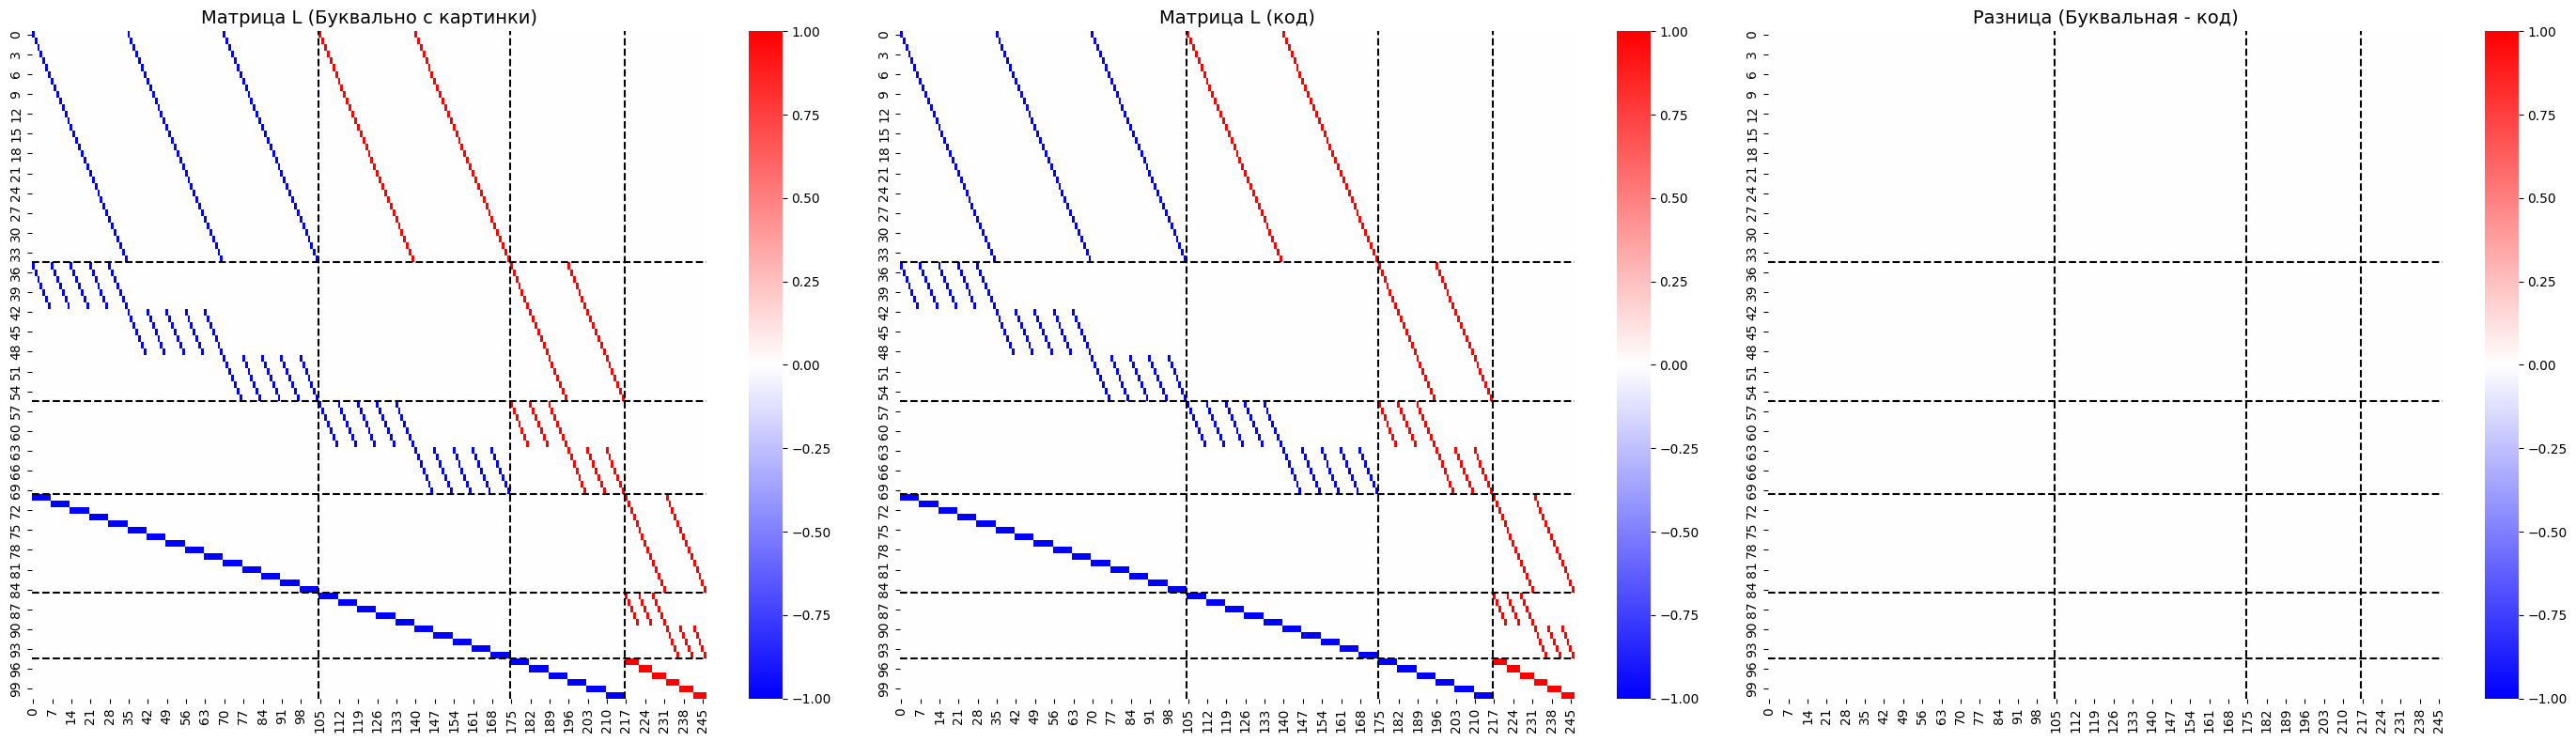

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Определения всех необходимых функций ---

def E(n): return np.eye(n)
def I(rows, cols): return np.ones((rows, cols))
def Z(rows, cols): return np.zeros((rows, cols))





# --- Основной блок ---
n1, n2, n3, n4 = 2, 3, 5, 7
L_strict = generate_L_from_image_strict(n1, n2, n3, n4)
L_optimized = build_L_matrix(1, n1, n2, n3, n4)

# Численное сравнение
if np.allclose(L_strict, L_optimized):
    print("✅ Численная проверка: Матрицы абсолютно идентичны.")
else:
    print("⚠️ Численная проверка: Обнаружены расхождения.")

# Визуальное сравнение
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(28, 8))

def draw_L_boundaries(n1, n2, n3, n4, ax_obj):
    row_sizes = [n3*n4, n2*n4, n1*n4, n2*n3, n1*n3, n1*n2]
    row_boundaries = np.cumsum(row_sizes)[:-1]
    for b in row_boundaries:
        ax_obj.axhline(y=b, color='black', linewidth=1.5, linestyle='--')
    col_sizes = [n2*n3*n4, n1*n3*n4, n1*n2*n4, n1*n2*n3]
    col_boundaries = np.cumsum(col_sizes)[:-1]
    for b in col_boundaries:
        ax_obj.axvline(x=b, color='black', linewidth=1.5, linestyle='--')

v_min, v_max = -1, 1
cmap = 'bwr'

# Карта 1: Буквальная версия
sns.heatmap(L_strict, cmap=cmap, ax=ax[0], cbar=True, vmin=v_min, vmax=v_max)
ax[0].set_title('Матрица L (Буквально с картинки)', fontsize=14)
draw_L_boundaries(n1, n2, n3, n4, ax[0])

# Карта 2: Оптимизированная версия
sns.heatmap(L_optimized, cmap=cmap, ax=ax[1], cbar=True, vmin=v_min, vmax=v_max)
ax[1].set_title('Матрица L (код)', fontsize=14)
draw_L_boundaries(n1, n2, n3, n4, ax[1])

# Карта 3: Разница
difference = L_strict - L_optimized
sns.heatmap(difference, cmap=cmap, ax=ax[2], cbar=True, vmin=v_min, vmax=v_max)
ax[2].set_title('Разница (Буквальная - код)', fontsize=14)
draw_L_boundaries(n1, n2, n3, n4, ax[2])

plt.tight_layout()
plt.show()

2 3 5 7
Количество нулевых строк: 16


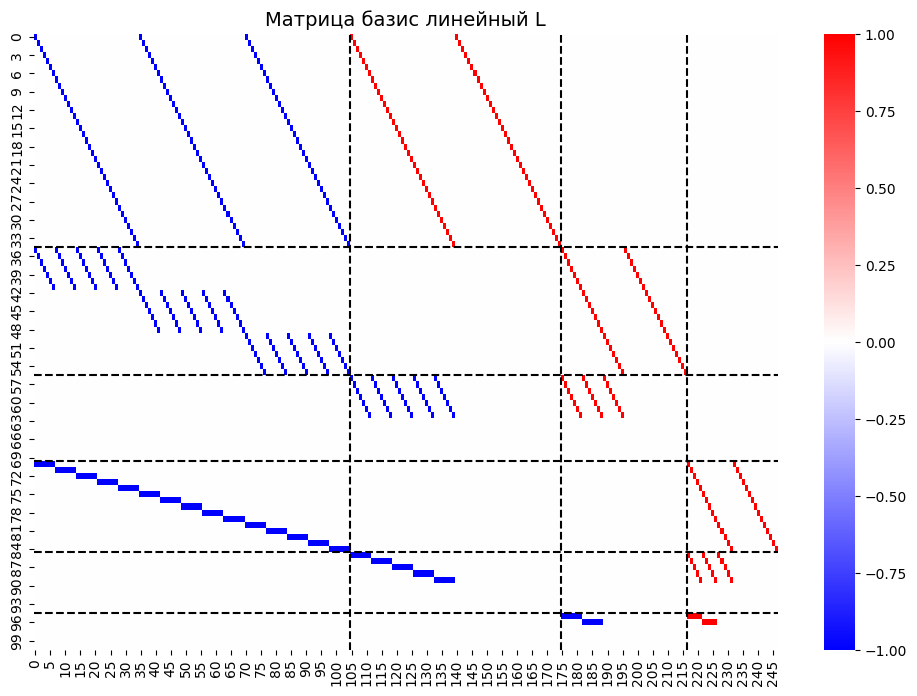

In [ ]:
def Ew1r(n):
  # Corrected to use the input parameter 'n' for np.eye size
  result = np.eye(n)
  if n > 0: # Ensure there's a row 0 to set to zero
      result[n-1, :] = 0
  return result

def generate_base(n1, n2, n3, n4):
  print(n1, n2, n3, n4)
  block1_1 = -reduce(np.kron, [Il(1), Il(n2), E(n3), E(n4)])
  block1_2 = reduce(np.kron, [Il(n1), Il(1), E(n3), E(n4)])
  block1_3 = Z(n3*n4, n1*n2*n4)
  block1_4 = Z(n3*n4, n1*n2*n3)

  row1 = np.hstack([block1_1, block1_2, block1_3, block1_4])

  block2_1 = -reduce(np.kron, [Il(1), E(n2), Il(n3), E(n4)])
  block2_2 = Z(n2*n4, n1*n3*n4)
  block2_3 = reduce(np.kron, [Il(n1), E(n2), Il(1), E(n4)])
  block2_4 = Z(n2*n4, n1*n2*n3)

  row2 = np.hstack([block2_1, block2_2, block2_3, block2_4])

  block3_1 = Z(n1*n4, n2*n3*n4)
  block3_2 = -reduce(np.kron, [Ew1r(n1), Il(1), Il(n3), E(n4)])
  block3_3 = reduce(np.kron, [Ew1r(n1), Il(n2), Il(1), E(n4)])
  block3_4 = Z(n1*n4, n1*n2*n3)

  row3 = np.hstack([block3_1, block3_2, block3_3, block3_4])

  block4_1 = -reduce(np.kron, [Il(1), E(n2), E(n3), Il(n4)])
  block4_2 = Z(n2*n3, n1*n3*n4)
  block4_3 = Z(n2*n3, n1*n2*n4)
  block4_4 = reduce(np.kron, [Il(n1), E(n2), E(n3), Il(1)])

  row4 = np.hstack([block4_1, block4_2, block4_3, block4_4])

  block5_1 = Z(n1*n3, n2*n3*n4)
  block5_2 = -reduce(np.kron, [Ew1r(n1), Il(1), E(n3), Il(n4)])
  block5_3 = Z(n1*n3, n1*n2*n4)
  block5_4 = reduce(np.kron, [Ew1r(n1), Il(n2), E(n3), Il(1)])

  row5 = np.hstack([block5_1, block5_2, block5_3, block5_4])

  block6_1 = Z(n1*n2, n2*n3*n4)
  block6_2 = Z(n1*n2, n1*n3*n4)
  block6_3 = -reduce(np.kron, [Ew1r(n1), Ew1r(n2), Il(1), Il(n4)])
  block6_4 = reduce(np.kron, [Ew1r(n1), Ew1r(n2), Il(n3), Il(1)])

  row6 = np.hstack([block6_1, block6_2, block6_3, block6_4])

  return np.vstack([row1, row2, row3, row4, row5, row6]) # Added return statement

L_base = generate_base(n1, n2, n3, n4)

zeros_count_abs = (np.abs(L_base).max(axis=1) < 1e-9).sum()
print(f"Количество нулевых строк: {zeros_count_abs}")



fig = plt.figure(figsize=(12, 8))
ax = fig.subplots(1, 1)
sns.heatmap(L_base, cmap=cmap, ax=ax, cbar=True, vmin=v_min, vmax=v_max)
ax.set_title('Матрица базис линейный L', fontsize=14)
draw_L_boundaries(n1, n2, n3, n4, ax)


Количество определителей 162
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


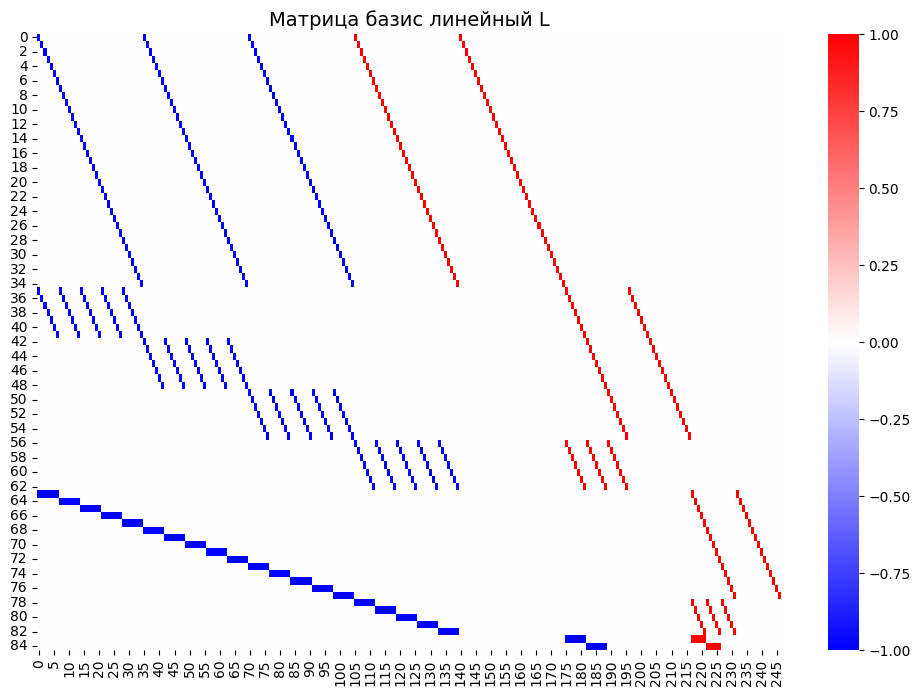

In [ ]:
zeros_rows = (np.abs(L_base).max(axis=1) > 1e-9)
L_without_zeros = L_base[zeros_rows, :]
fig = plt.figure(figsize=(12, 8))
ax = fig.subplots(1, 1)
sns.heatmap(L_without_zeros, cmap=cmap, ax=ax, cbar=True, vmin=v_min, vmax=v_max)
ax.set_title('Матрица базис линейный L', fontsize=14)
rank = L_base.shape[0] - zeros_count_abs


dets = [float(np.linalg.det(L_without_zeros[:, i : i + rank])) for i in range(0, L_without_zeros.shape[1] - rank)]
print("Количество определителей",len(dets))
print(dets)

In [ ]:
L_baseL_baseT = L_without_zeros @   .T
np.linalg.eig(L_baseL_baseT)

EigResult(eigenvalues=array([17.        , 16.06637298, 11.09901951, 15.22237907, 14.        ,
       10.        , 13.08276253, 12.        , 12.        ,  0.93362702,
        0.33780453,  2.51012812, 11.09901951, 14.        , 12.        ,
       10.        ,  0.90098049,  0.92968828,  0.91723747, 11.09901951,
        0.90098049,  0.90098049,  9.12310563, 10.        , 12.        ,
       11.09901951,  9.12310563,  9.        , 10.        ,  7.        ,
        7.        ,  0.90098049,  0.87689437,  0.87689437,  0.87689437,
        9.12310563,  9.        ,  0.87689437, 10.        ,  9.12310563,
        9.        ,  5.        ,  7.        ,  9.        ,  5.        ,
        7.        ,  0.87689437,  0.87689437,  5.        ,  5.        ,
        5.        ,  5.        ,  5.        ,  9.12310563,  9.12310563,
        7.        ,  9.        , 10.        ,  7.        ,  9.        ,
        5.        ,  7.        ,  9.        ,  9.        ,  7.        ,
        5.        ,  5.        ,  5.      

In [ ]:
eigenvalues_LLT, V_LLT = np.linalg.eigh(L_base @ L_base.T)
print(eigenvalues_LLT)

# Sort eigenvalues in descending order
sorted_idx = np.argsort(eigenvalues_LLT)[::-1]
sorted_eigenvalues = eigenvalues_LLT[sorted_idx]
sorted_eigenvectors = V_LLT[:, sorted_idx]

# Display the top 10 eigenvalues
print("Первые 10 собственных значений L*L^T (округленные до целых):")
for i, val in enumerate(sorted_eigenvalues[:10]):
    print(f"  λ{i+1} = {int(round(val.real))}") # Используем .real и округляем до целого

# Расчет спектра собственных значений (уникальные значения и их кратности)
eigenvalue_counts = {}
for eig_val in sorted_eigenvalues:
    # Округляем, чтобы сгруппировать близкие значения, затем приводим к int
    # Используем .real на случай, если собственные значения окажутся комплексными (хотя для L*L^T они должны быть вещественными)
    processed_eig_val = int(round(eig_val.real))
    if processed_eig_val in eigenvalue_counts:
        eigenvalue_counts[processed_eig_val] += 1
    else:
        eigenvalue_counts[processed_eig_val] = 1

print("\nСпектр собственных значений (значение: кратность):")
# Сортируем по значению для более наглядного вывода
for eig_val, count in sorted(eigenvalue_counts.items(), key=lambda item: item[0], reverse=True):
    print(f"  {eig_val}: {count}")

# Проверка зануления собственных значений после 58-го (согласно предположению)
if len(sorted_eigenvalues) > 58:
    print("\nПроверка собственных значений после 58-го (округленные до целых):")
    all_zero_after_58 = True
    for i in range(58, len(sorted_eigenvalues)):
        val_int = int(round(sorted_eigenvalues[i].real))
        print(f"  λ{i+1} = {val_int}")
        if val_int != 0:
            all_zero_after_58 = False
    if all_zero_after_58:
        print("Все собственные значения после 58-го (включительно) равны 0 (после округления).")
    else:
        print("Не все собственные значения после 58-го равны 0 (после округления).")
else:
    print("\nКоличество собственных значений меньше или равно 58, проверка зануления после 58-го неактуальна.")

[-3.71016695e-15 -2.29442441e-15 -1.84733196e-15 -9.94595656e-16
 -5.37755854e-16 -5.30117885e-16 -6.90341590e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.80354641e-16
  7.82213708e-16  2.03699879e-15  2.57589649e-15  2.75725294e-15
  3.37804531e-01  8.76894374e-01  8.76894374e-01  8.76894374e-01
  8.76894374e-01  8.76894374e-01  8.76894374e-01  9.00980486e-01
  9.00980486e-01  9.00980486e-01  9.00980486e-01  9.17237470e-01
  9.29688275e-01  9.33627025e-01  2.51012812e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00  5.00000000e+00  7.00000000e+00
  7.00000000e+00  7.00000000e+00  7.00000000e+00  7.00000000e+00
  7.00000000e+00  7.00000